### Binary Classification Problem

To predict if a client will subscribe to a Fixed-Term Deposit. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [234]:
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
train = pd.read_csv('train_bank.csv')
test = pd.read_csv('test_bank.csv')
train_original = train.copy()
test_original = test.copy()

### Data Summary

In [4]:
train.shape, test.shape

((31647, 18), (13564, 17))

In [5]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

'subscribed' is the target variable. Factors on which 'subscribed' might depend:<br>
1. Low age & high balance -> high chances of subscribing to a term deposit. <br>
2. Personal loan (yes), housing loan (yes) & credit default (yes) -> lower chances of subscribing to a term deposit. 

In [12]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

Categorical Features: job, marital status, education, default on credit, housing loan, personal loan, type of communication contact, contact month, outcome of the previous marketing campaign, subscribed.

Numerical Features: ID, age, balance, day of the week of contact, contact duration, number of contacts performed during this campaign to the client, number of days that passed by after the client was last contacted, number of contacts performed during this campaign.

In [13]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [15]:
#Fetching the unique values in each categorical feature
for col in train.select_dtypes(include='object').columns:
    print(col,"--->>>")
    print(train[col].unique())

job --->>>
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital --->>>
['married' 'divorced' 'single']
education --->>>
['unknown' 'secondary' 'tertiary' 'primary']
default --->>>
['no' 'yes']
housing --->>>
['no' 'yes']
loan --->>>
['no' 'yes']
contact --->>>
['telephone' 'cellular' 'unknown']
month --->>>
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome --->>>
['unknown' 'success' 'failure' 'other']
subscribed --->>>
['no' 'yes']


In [23]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


1. Mean age is 41 years; min = 18 yrs & max = 95 yrs.<br>
2. Mean balance is 1363 but std dev is high which implies that balance is heavily distributed across the dataset. 

### Missing Value Treatment

In [17]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [18]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

No missing values in the dataset.

### Univariate Analysis

<Figure size 500x500 with 0 Axes>

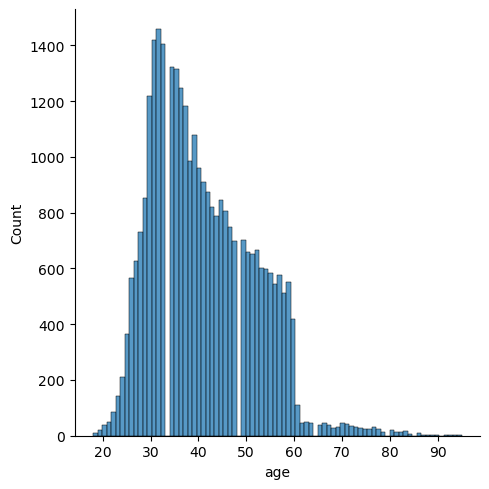

In [37]:
plt.figure(figsize=(5,5))
sns.displot(train['age'])

'Age' is close to normal distribution & most of the clients fall in the age group of 25-60. 

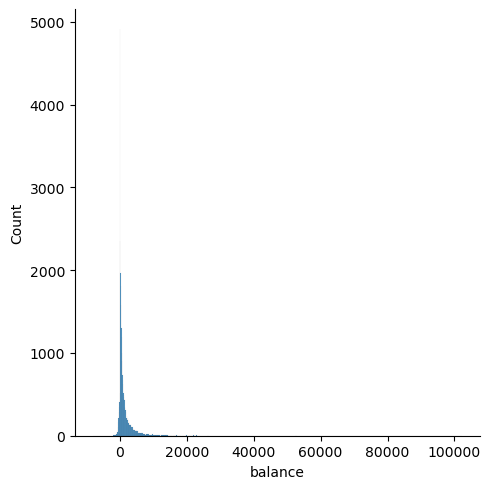

In [33]:
sns.displot(train['balance'])

'balance' is right skewed & may have some outliers. 

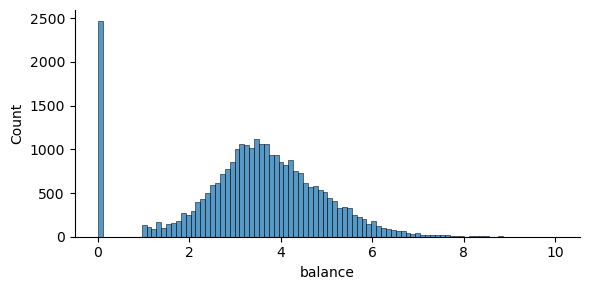

In [109]:
sns.displot(np.power(train['balance'],1/5), height=3, aspect=2)

<Axes: >

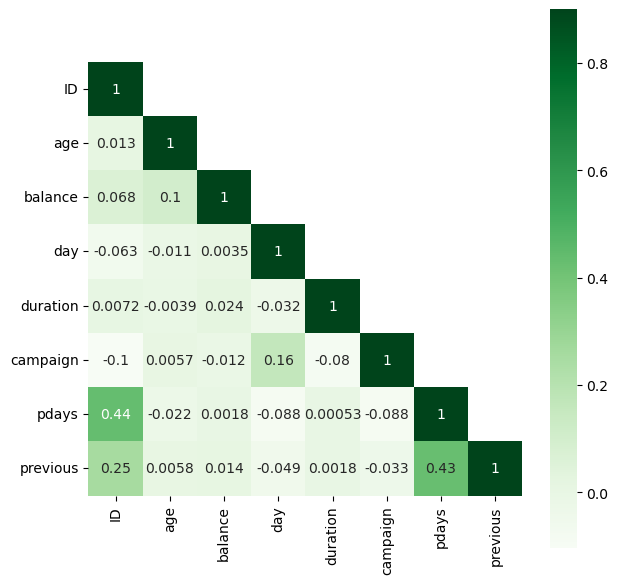

In [70]:
corr = train.corr(numeric_only=True)
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(7,7)
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True, cmap="Greens")

We don't observe any correlation btw numerical features. 

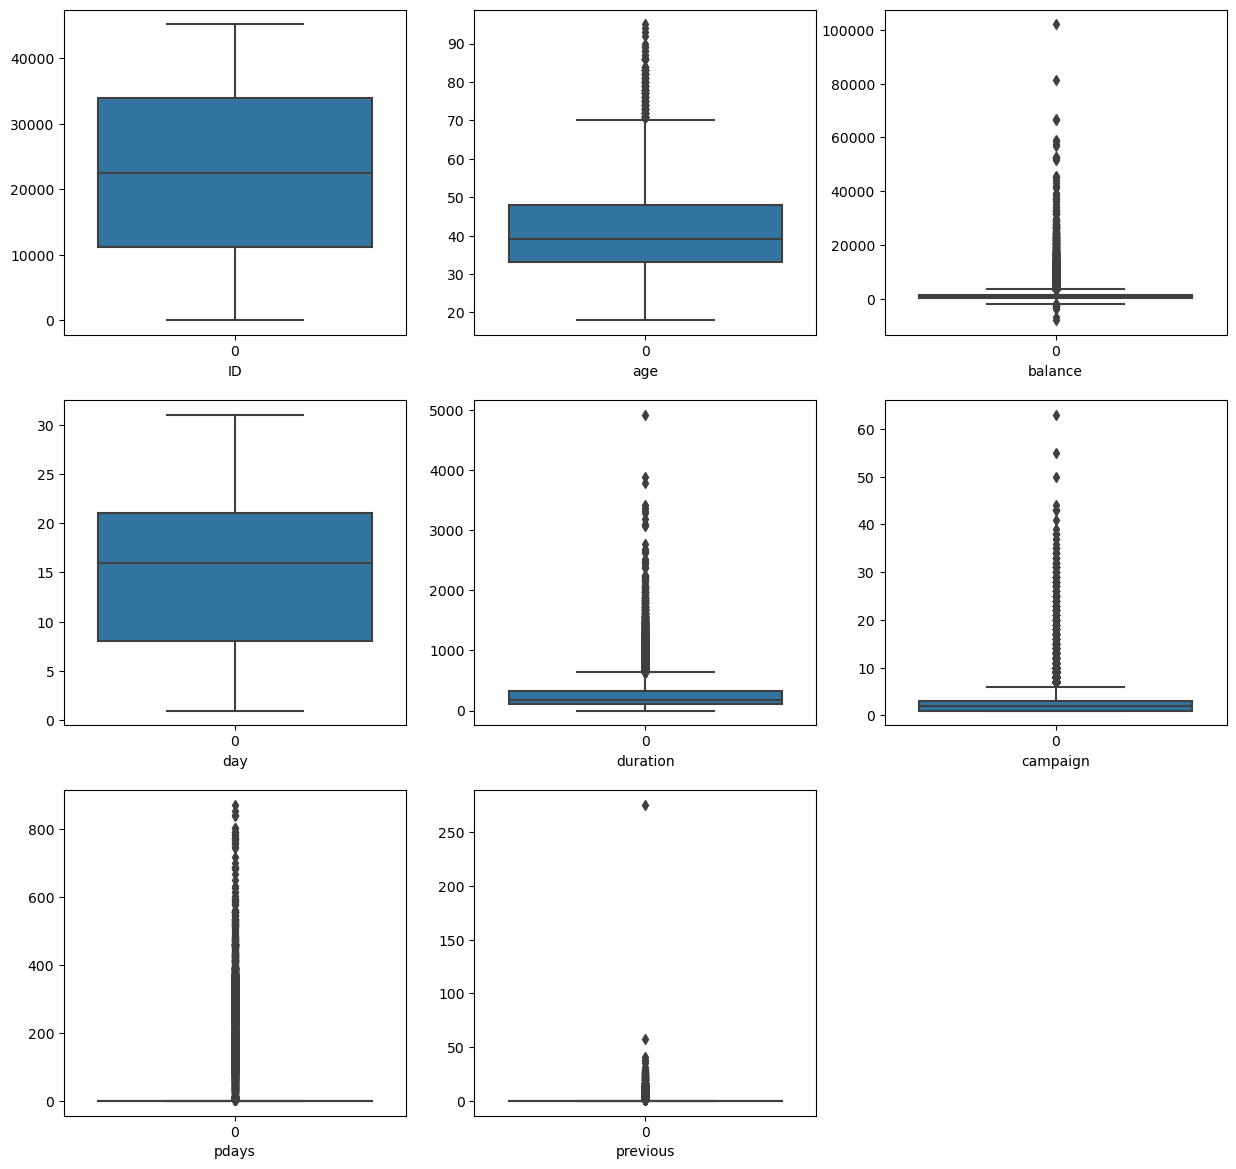

In [56]:
# finding outliers in numerical features
plt.figure(figsize=(15,60), facecolor='white')
plotnumber=1
numerical_features=[col for col in train.select_dtypes(include='integer').columns]
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(train[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

age, balance, duration, campaign, pdays & previous - have outliers. 

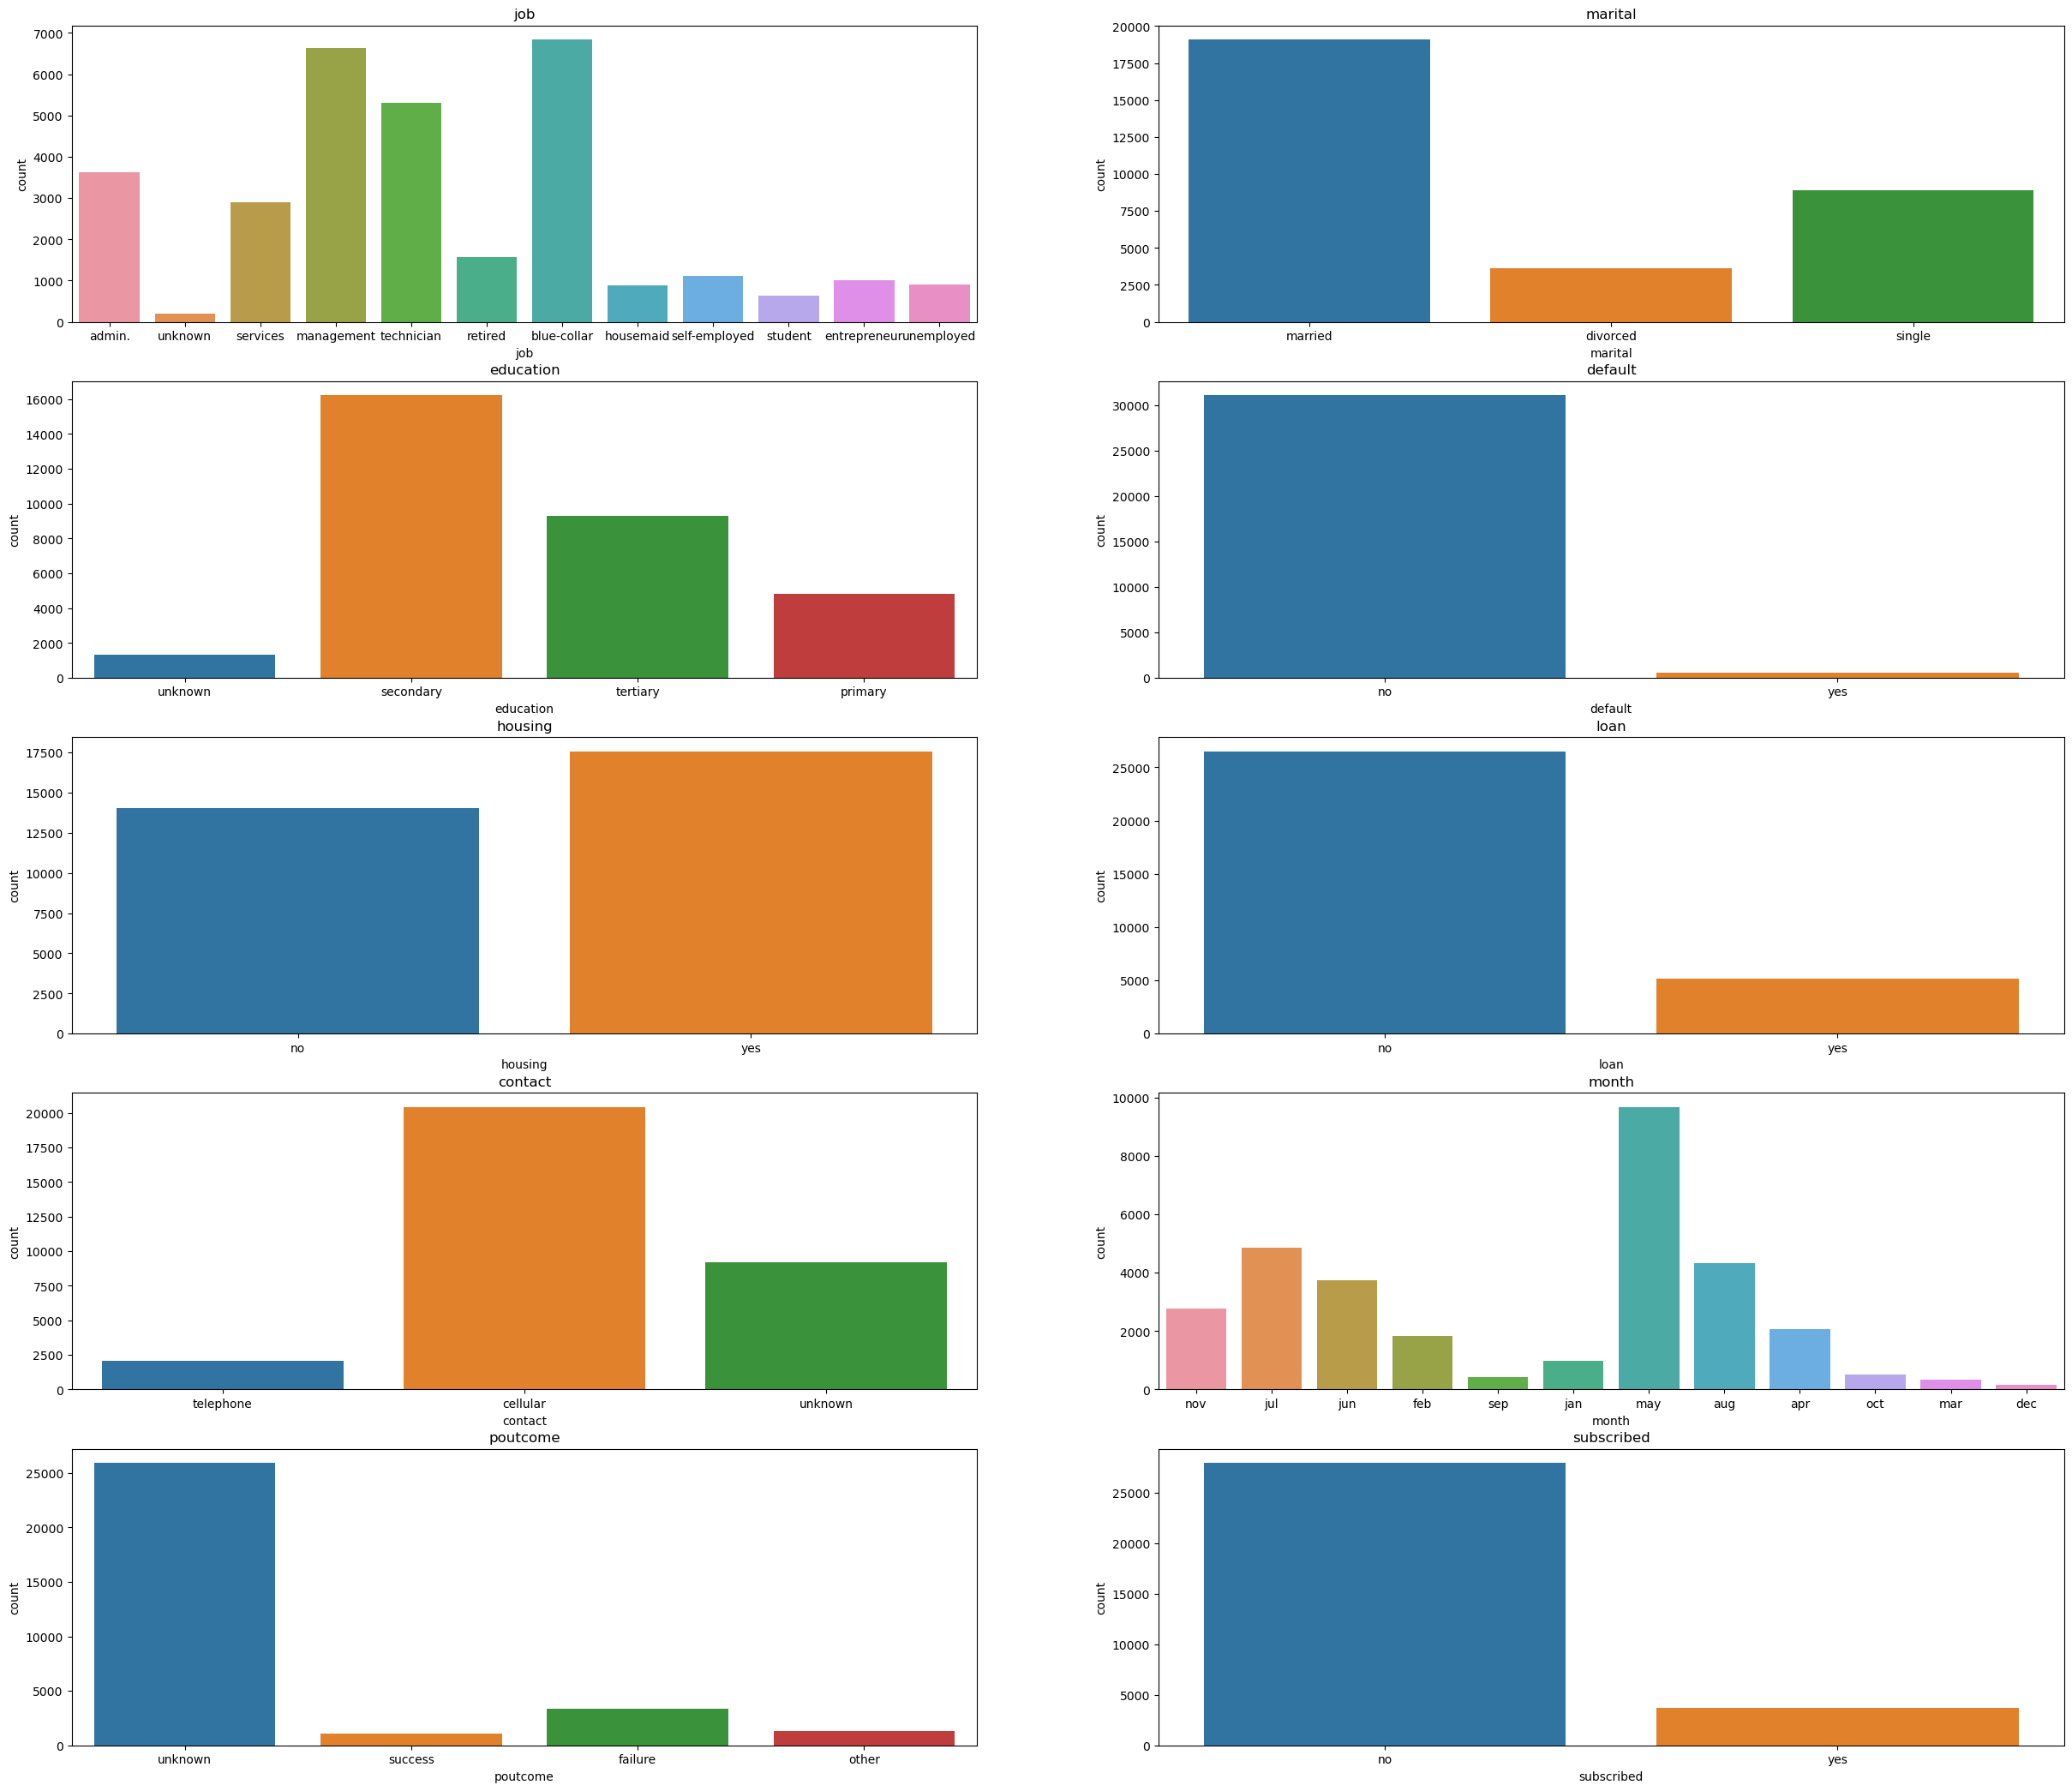

In [55]:
categorical_features=[col for col in train.select_dtypes(include='object').columns]
# Univariate analysis on all Categorical features
plt.figure(figsize=(30,80), facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(15,2,plotnumber)
    sns.countplot(x=categorical_feature,data=train)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()  

Inferences:<br>
1. Most clients work in blue-collar, management & technician roles.<br>
2. Students, house-maids, unemployed & divorcees are less. <br>
3. Most clients are married & have completed secondary education. <br>
4. Almost all clients have no credit default.<br>
5. Most clients do not have a personal loan & were contacted via cellular method. <br>
6. Most number of contacts were carried out in May. <br>
7. Least number of contacts were carried out in December. <br>
8. Outcome of previous marketing campaign is unknown for most of the clients. <br>
9. Number of failures are higher when compared to success in the results of previous marketing campaign. <br>
10. Most clients have not opt for or have not invested in Term Deposit. <br>

In [59]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

88% of clients do not opt for Term Deposit.

In [66]:
train['default'].value_counts(normalize=True)

no     0.981515
yes    0.018485
Name: default, dtype: float64

98% of clients have no default history -> 'default' feature can be dropped from the dataset. 

In [89]:
train['pdays'].value_counts(normalize=True)

-1      0.819161
 182    0.003729
 92     0.003160
 91     0.002749
 183    0.002686
          ...   
 51     0.000032
 20     0.000032
 25     0.000032
 526    0.000032
 382    0.000032
Name: pdays, Length: 509, dtype: float64

The value -1 is fetched in 82% of total rows of the dataset. Thus, the feature 'pdays' has outlier and can be removed.

<Axes: xlabel='marital'>

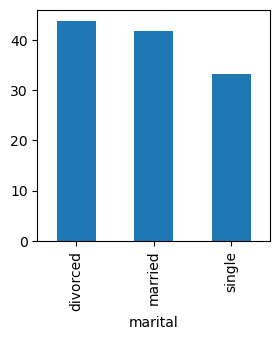

In [62]:
plt.figure(figsize=(3,3))
defaulters = train.loc[(train['default']=='yes'),:]
defaulters.groupby('marital')['age'].mean().plot.bar()

<Axes: >

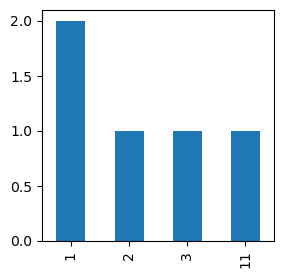

In [64]:
plt.figure(figsize=(3,3))
def2 = train.loc[(train.default=='yes') & (train.marital=='single') & (train.job=='unemployed')]
def2.campaign.value_counts().plot(kind='bar')

### Bivariate Analysis

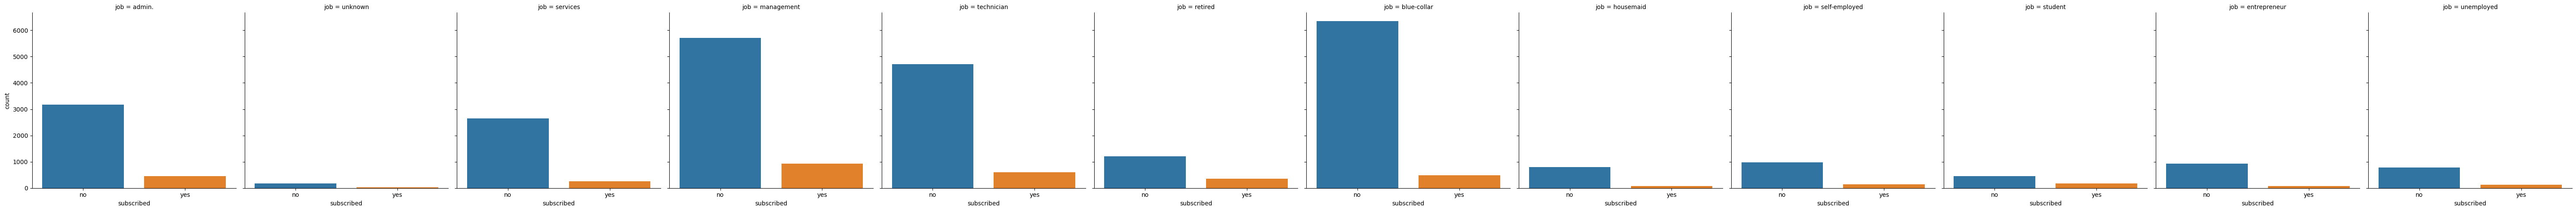

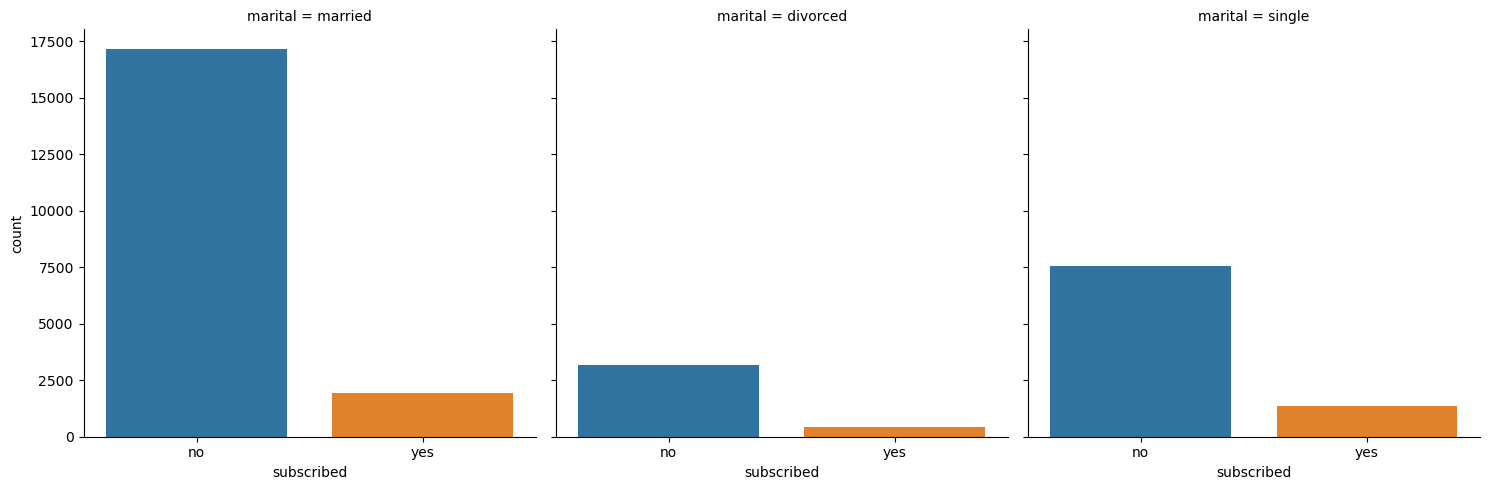

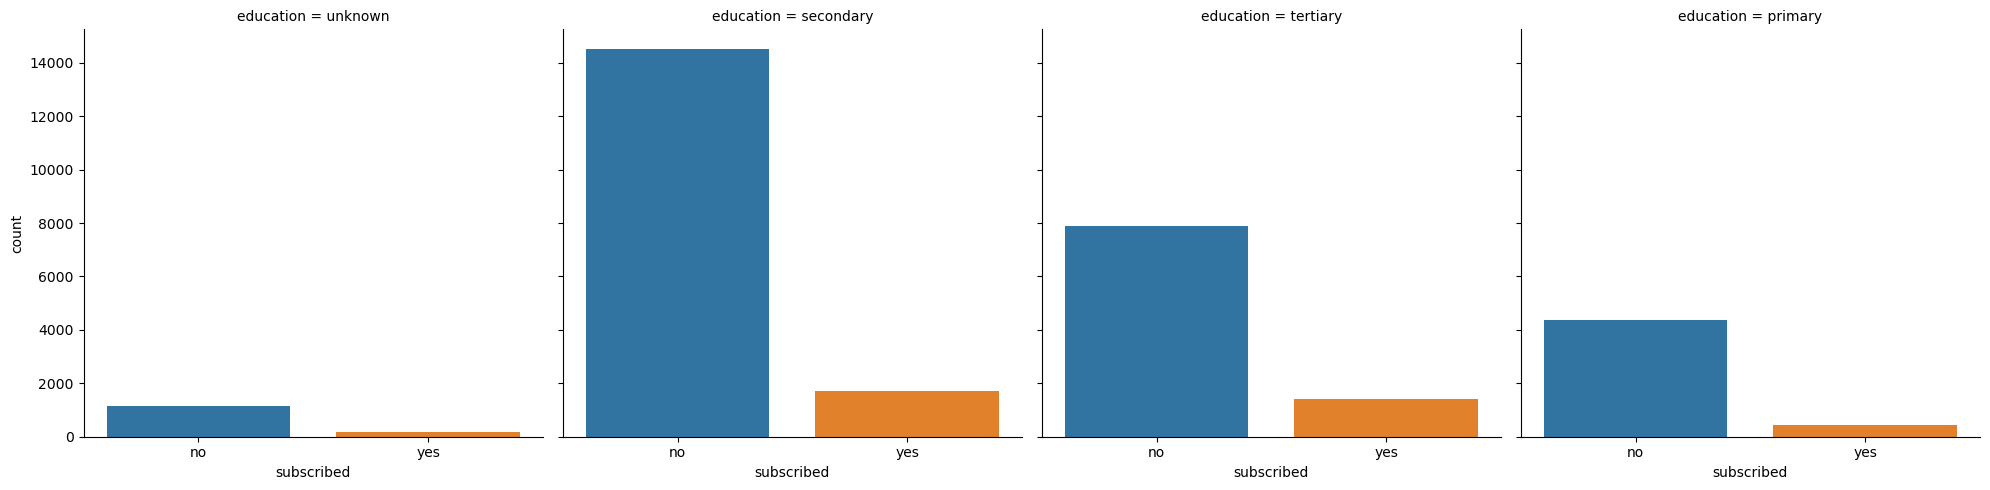

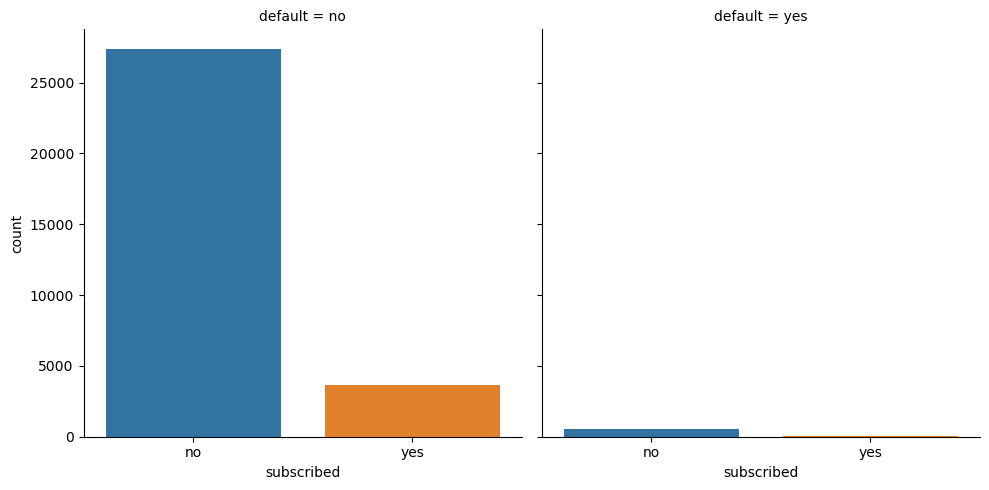

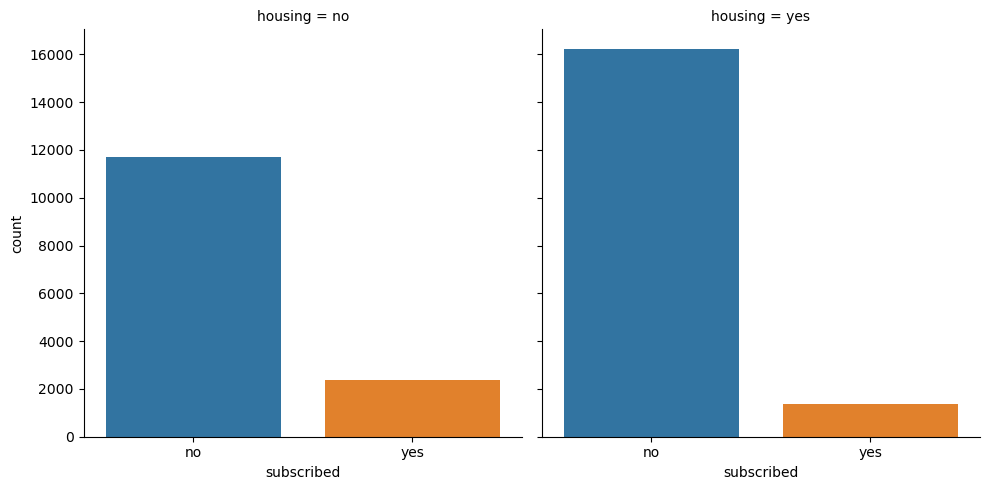

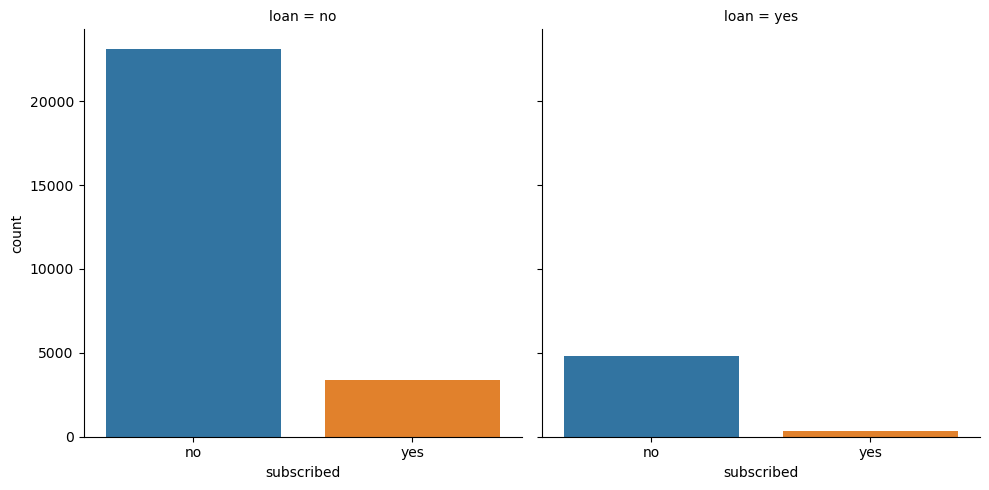

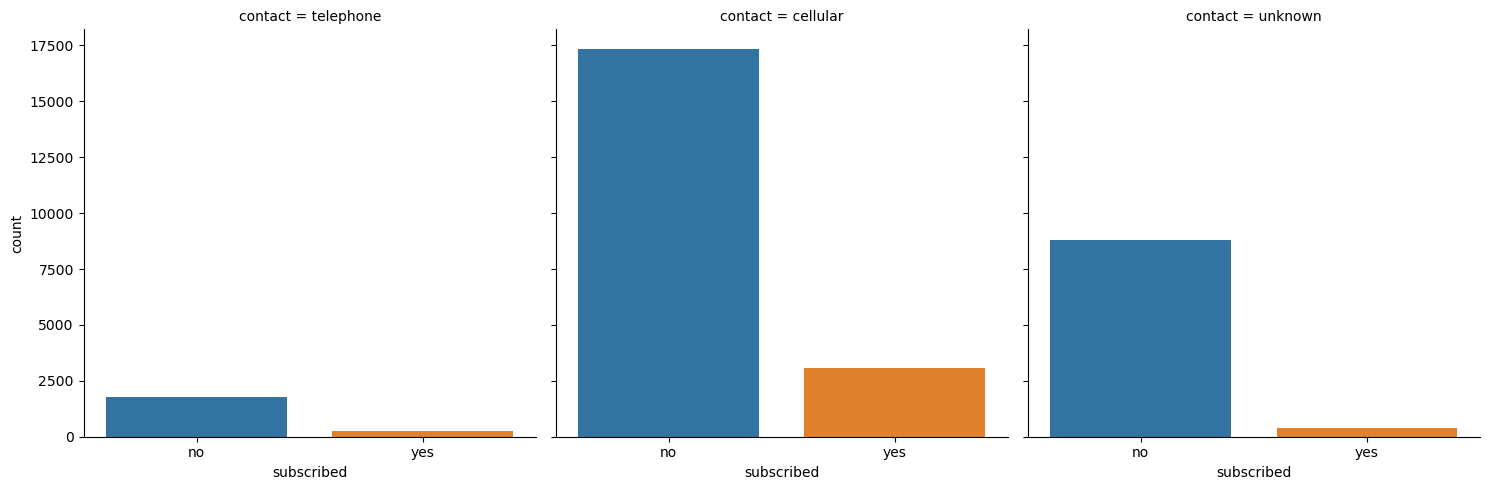

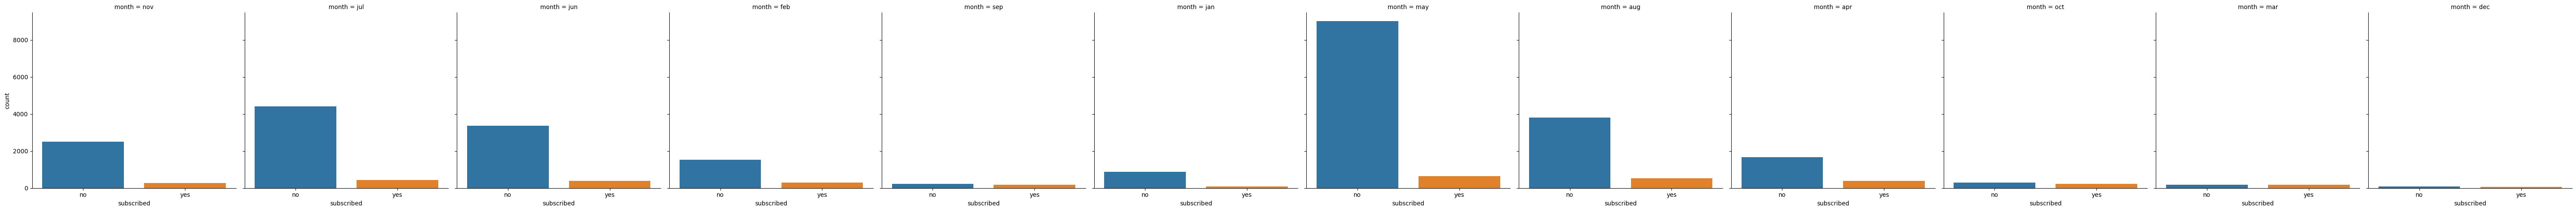

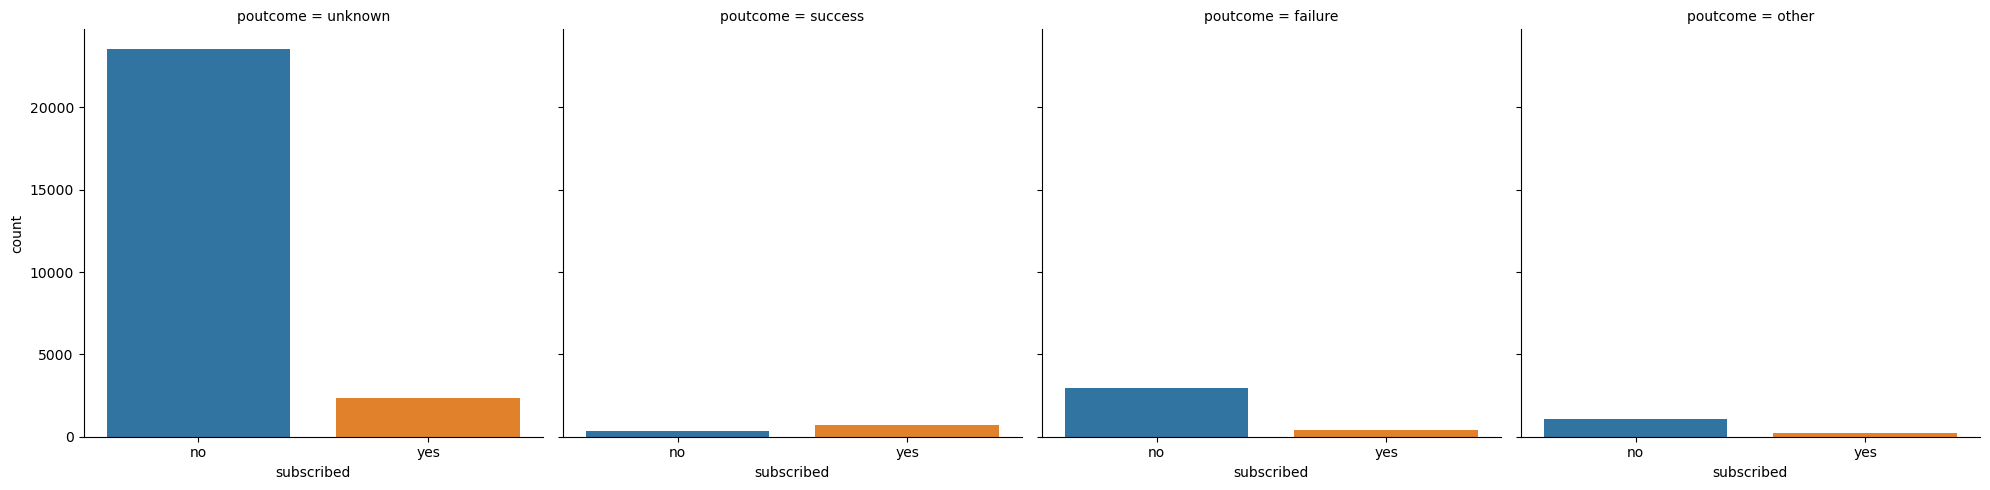

In [68]:
categorical_features=[col for col in train.select_dtypes(include='object').columns
                     if (col not in ['subscribed'])]
for categorical_feature in categorical_features:
    sns.catplot(x='subscribed',col=categorical_feature, kind='count', data=train)
plt.show()

1. The chances of client availing term deposit are very low. <br>
2. Students & retirees have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is comparatively less than other job types which seems to imply that more students have subscribed to a term deposit. <br>
3. Clients having no default history have higher chances of subscribing to a term deposit. <br>

In [90]:
train.groupby(['subscribed','balance'],sort=True)['balance'].count()

subscribed  balance
0           -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
1            32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: balance, Length: 7969, dtype: int64

Clients with negative balance do not opt for term deposit.

In [91]:
train.groupby(['subscribed','duration'],sort=True)['duration'].count()

subscribed  duration
0           0            1
            2            3
            3            3
            4           11
            5           20
                        ..
1           2775         1
            3076         1
            3102         1
            3183         1
            3881         1
Name: duration, Length: 2381, dtype: int64

Lower the duration of contact, lower the chances of client investing in term deposit. 

In [92]:
train.groupby(['subscribed','campaign'],sort=True)['campaign'].count()

subscribed  campaign
0           1           10486
            2            7792
            3            3439
            4            2213
            5            1147
                        ...  
1           16              2
            17              6
            20              1
            24              1
            32              1
Name: campaign, Length: 65, dtype: int64

Lower the number of contacts with client during a campaign, lower the chances of client investing in term deposit. 

<Axes: xlabel='default', ylabel='balance'>

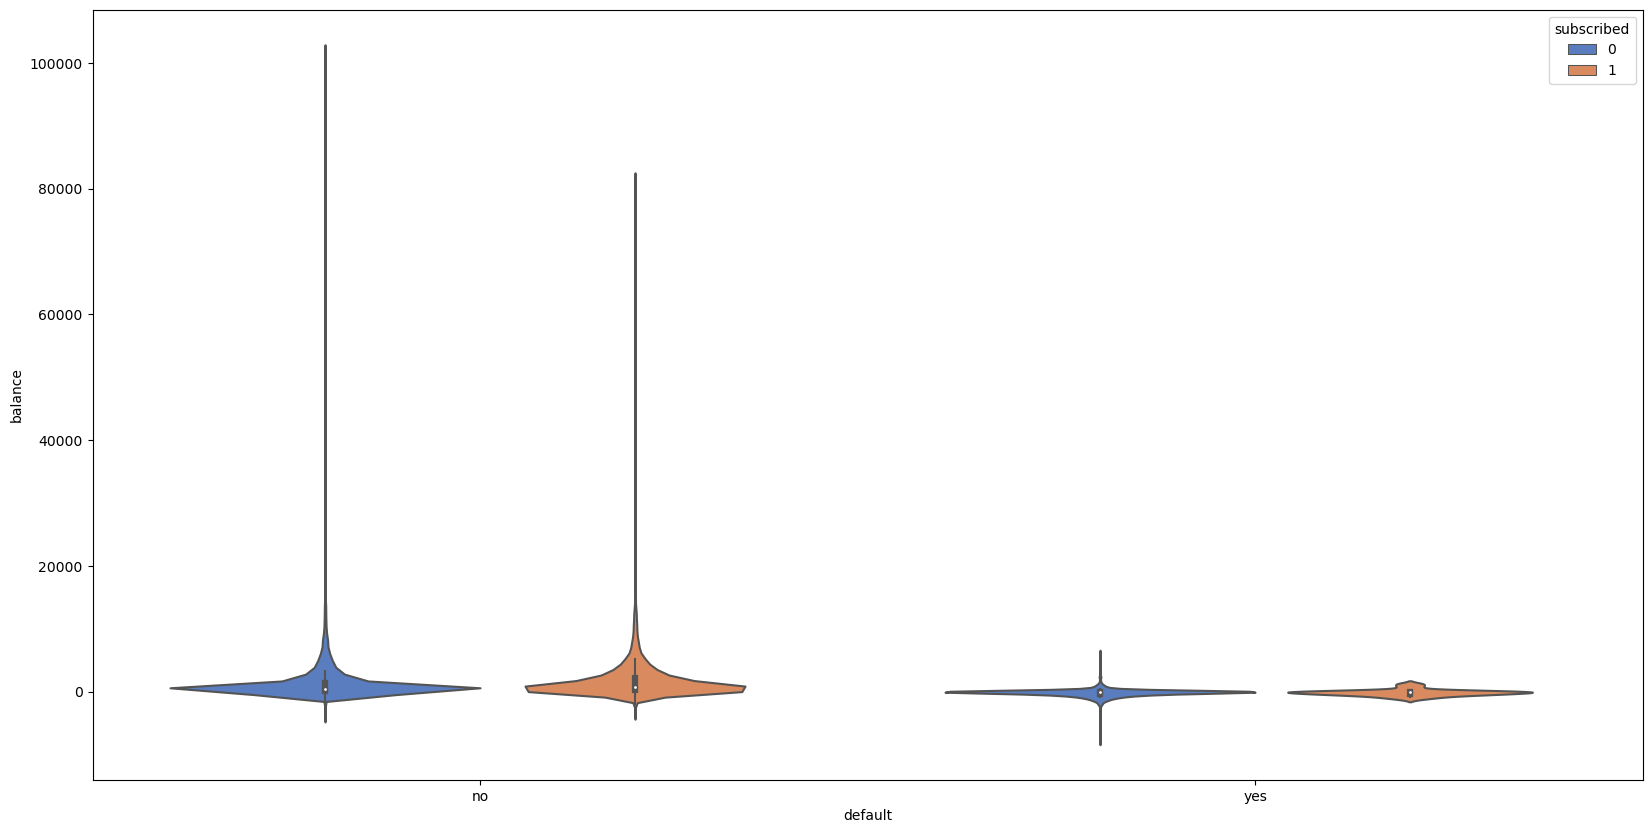

In [107]:
plt.figure(figsize=(20,10))
sns.violinplot(x="default", y="balance", hue="subscribed", data=train, palette="muted")

Individuals with no credit default history have higher account balance. 

<Axes: xlabel='job', ylabel='balance'>

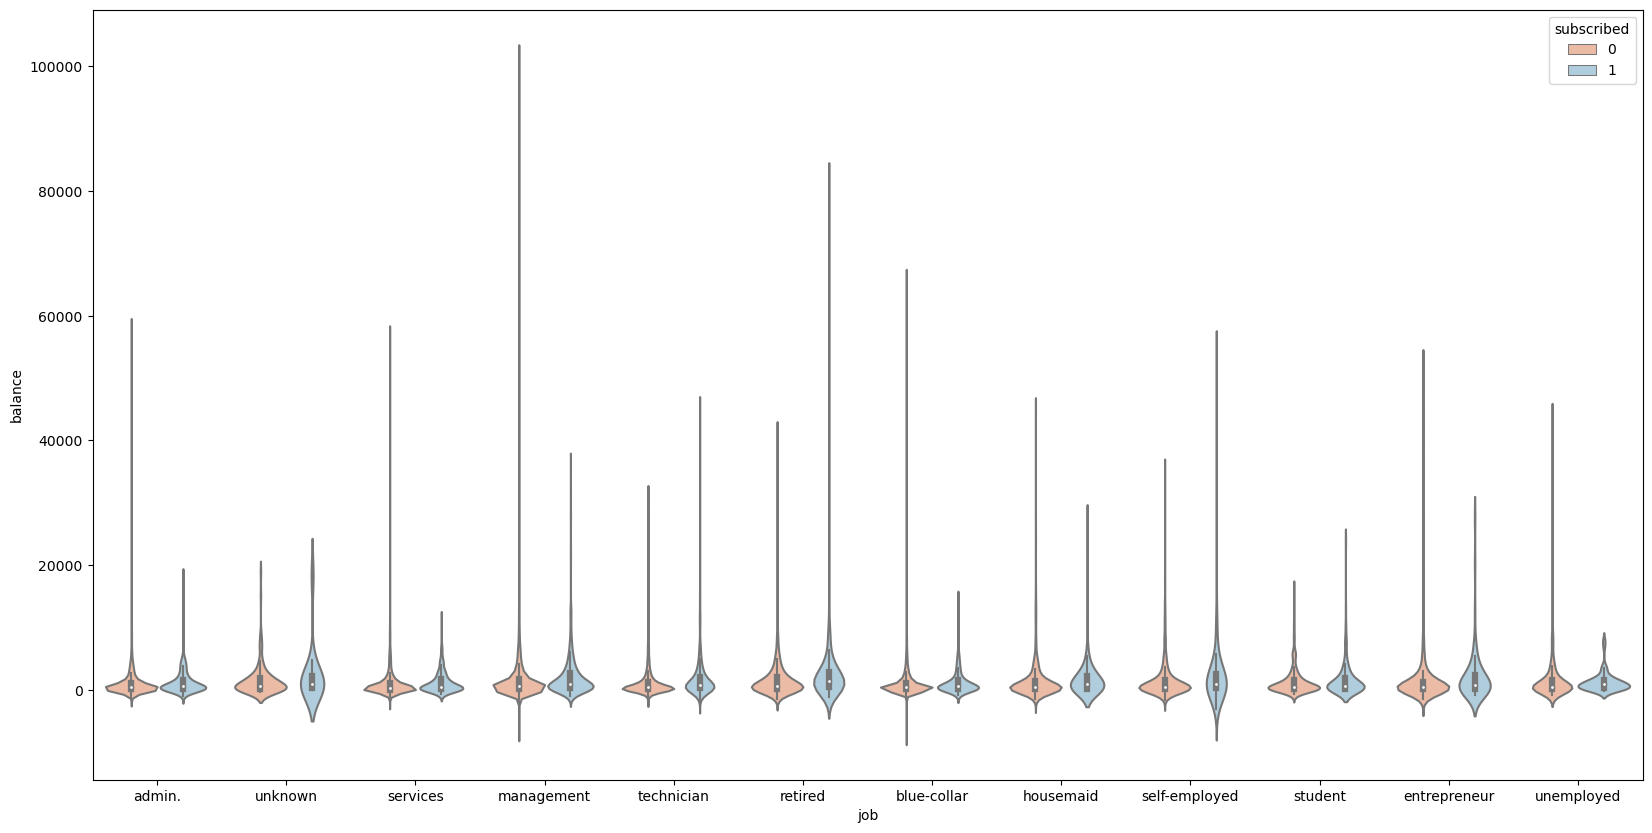

In [106]:
plt.figure(figsize=(20,10))
sns.violinplot(x="job", y="balance", hue="subscribed", data=train, palette="RdBu")

Management & Retirees have the highest balance in their accounts. 

<Axes: xlabel='education', ylabel='balance'>

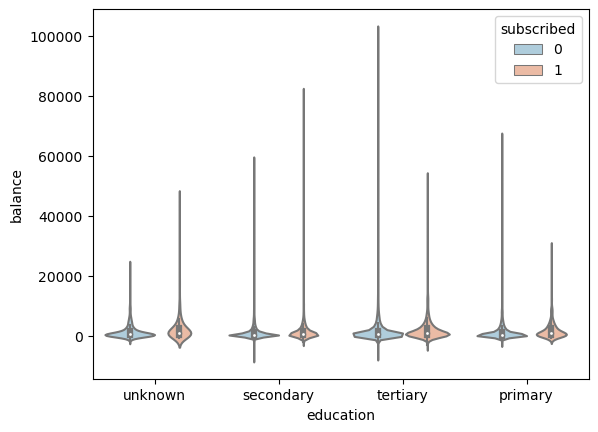

In [105]:
sns.violinplot(data=train, x="education", y="balance", hue="subscribed", palette="RdBu_r")

The ones who have completed tertiary education have the highest balance in their accounts.

<Axes: xlabel='marital', ylabel='balance'>

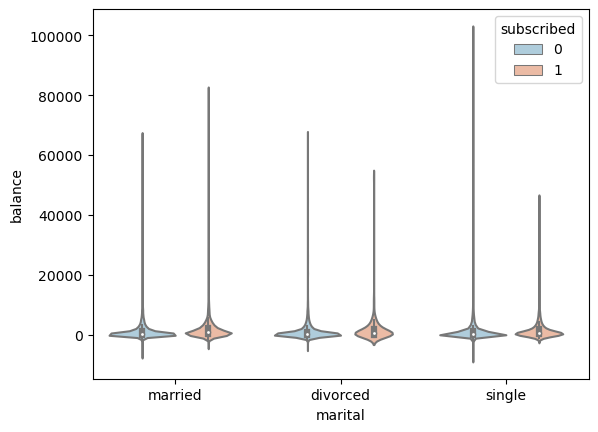

In [108]:
sns.violinplot(data=train, x="marital", y="balance", hue="subscribed", palette="RdBu_r")

Most single/unmarried individuals have the highest balance in their accounts. Most divorcees are broke.

In [80]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)
# train['subscribed'] = train['subscribed'].map({'yes': 1, 'no': 0})

<Axes: >

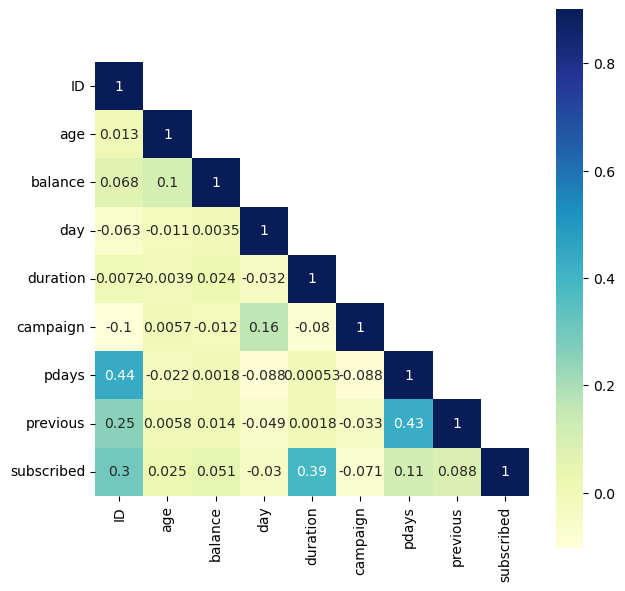

In [82]:
corr = train.corr(numeric_only=True)
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(7,7)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap = "YlGnBu")

We can infer that duration of the call is significantly correlated with the target variable. More the call duration, higher the chances of client subscribing to term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. Duration is not known before a call is performed. 'duration' is a leakage variable, so it needs to be dropped.

## Feature Engineering

In [116]:
train.drop(['ID','default','pdays','duration'],inplace=True,axis=1)
test.drop(['ID','default','pdays','duration'],inplace=True,axis=1)

### Encoding Categorical Features
Converting categorical features into matrix form with 1 & 0 values.<br>
Use Label Encoding when the categorical feature is ordinal & the number of categories are large.<br>
Use One Hot Encoding when the categorical feature is NOT ordinal & the number of categories are less. 

In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
train_dummies = pd.get_dummies(train[['housing', 'loan']], drop_first = True)
train_label = train[['job','education', 'month', 'marital', 'contact', 'poutcome']].apply(LabelEncoder().fit_transform)
train.drop(['job', 'marital', 'housing', 'loan', 'contact','poutcome', 'education', 'month'],inplace=True,axis = 1)
train = pd.concat([train, train_dummies, train_label], axis = 1)


In [230]:
test_dummies = pd.get_dummies(test[['housing', 'loan']], drop_first = True)
test_label = test[['job', 'education', 'month', 'marital','contact', 'poutcome']].apply(LabelEncoder().fit_transform)
test.drop(['job', 'marital', 'housing', 'loan', 'contact','poutcome', 'education', 'month'],inplace=True,axis = 1)
test = pd.concat([test, test_dummies, test_label], axis = 1)

In [120]:
train.columns

Index(['age', 'balance', 'day', 'campaign', 'previous', 'subscribed',
       'housing_yes', 'loan_yes', 'job', 'education', 'month', 'marital',
       'contact', 'poutcome'],
      dtype='object')

In [231]:
test.columns

Index(['age', 'balance', 'day', 'campaign', 'previous', 'housing_yes',
       'loan_yes', 'job', 'education', 'month', 'marital', 'contact',
       'poutcome'],
      dtype='object')

In [124]:
train.tail()

,age,balance,day,campaign,previous,subscribed,housing_yes,loan_yes,job,education,month,marital,contact,poutcome
31642,29,0,12,2,0,0,1,0,4,2,8,2,0,3
31643,53,380,5,2,0,1,0,1,4,2,6,0,0,3
31644,32,312,7,3,0,0,0,0,4,2,1,2,0,3
31645,57,225,15,7,12,0,1,0,9,1,8,1,1,0
31646,55,204,11,2,0,1,1,0,4,1,5,0,0,3


In [126]:
target = train['subscribed']
train.drop('subscribed',inplace=True,axis=1)

### Train-Val Split

In [281]:
x_train, x_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [282]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((25317, 13), (25317,), (6330, 13), (6330,))

## Model Selection

In [150]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/99.7 MB 15.5 MB/s eta 0:00:07
    --------------------------------------- 1.6/99.7 MB 17.0 MB/s eta 0:00:06
   - -------------------------------------- 3.0/99.7 MB 23.7 MB/s eta 0:00:05
   - -------------------------------------- 4.8/99.7 MB 30.8 MB/s eta 0:00:04
   -- ------------------------------------- 6.3/99.7 MB 30.8 MB/s eta 0:00:04
   --- ------------------------------------ 7.7/99.7 MB 32.7 MB/s eta 0:00:03
   --- ------------------------------------ 9.0/99.7 MB 30.1 MB/s eta 0:00:04
   ---- ----------------------------------- 10.6/99.7 MB 34.4 MB/s eta 0:00:03
   ---- ----------------------------------- 12.3/99.7 MB 38.6 MB/s eta 0:00:03
   ----- ------------

In [151]:
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [156]:
# Random Forest Classifier
rand_scores = cross_val_score(estimator=RFC(), X=x_train, y=y_train, cv=5)
print("RFC cross-val mean score = ", rand_scores.mean())

# XG Boost Classifier
xgb_scores = cross_val_score(estimator=XGB(), X=x_train, y=y_train, cv=5)
print("XGB cross-val mean score = ", xgb_scores.mean())

# KNearestNeighbors Classifier
knn_scores = cross_val_score(estimator=KNN(), X=x_train, y=y_train, cv=5)
print("KNN cross-val mean score = ", knn_scores.mean())

# Decision Tree Classifier
dtc_scores = cross_val_score(estimator=DTC(), X=x_train, y=y_train, cv=5)
print("DTC cross-val mean score = ", dtc_scores.mean())

RFC cross-val mean score =  0.9762138944318355
XGB cross-val mean score =  0.8652796523325671
KNN cross-val mean score =  0.8603521597592655
DTC cross-val mean score =  0.9414083330271144


Random Forest Classifier performs best on validation set. 

## Random Forest Classifier

## Model Building

In [287]:
model = RFC().fit(x_train, y_train)
y_pred = model.predict(x_val)
accuracy = acc(y_val, y_pred)

In [288]:
accuracy

0.892259083728278

In [294]:
model.score(x_train,y_train)

0.9999210016984634

89% accuracy on validation set. 10% difference between training & test accuracy. This difference can be improved up to 5%.

In [289]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5608
           1       0.59      0.19      0.29       722

    accuracy                           0.89      6330
   macro avg       0.74      0.59      0.61      6330
weighted avg       0.87      0.89      0.87      6330



Precision:<br>
the model is 90% sure that the actual label is "NO". <br>
the model is 60% sure that the actual label is "YES". 

In [290]:
print(confusion_matrix(y_val,y_pred))

[[5511   97]
 [ 585  137]]


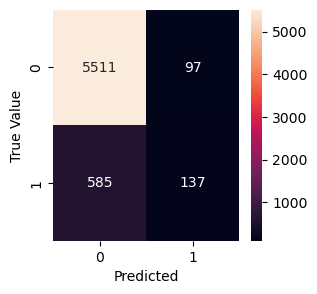

In [291]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

Text(0.5, 1.0, 'Feature Importances Based on Random Forest Classifier')

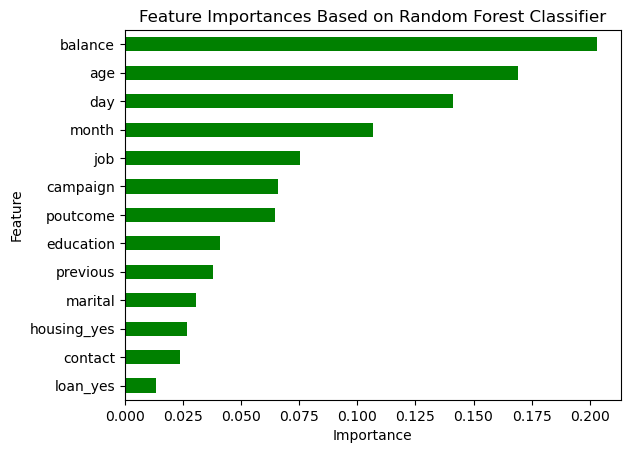

In [303]:
global_importances = pd.Series(model.feature_importances_, index=x_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances Based on Random Forest Classifier")

In [233]:
test_pred = model.predict(test)
submission['subscribed'] = test_pred
submission = pd.DataFrame()
# creating a Business_Sourced column to save the predictions in it
submission['ID'] = test_original['ID']
# Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)
submission.to_csv('submission_FD.csv', header=True, index=False)

In [247]:
# alternative
# submission = pd.DataFrame(pred_test, columns = ['subscribed'])
# submission = pd.concat([test_original['ID'], submission], axis = 1)
submission.head()

,subscribed
0,no
1,no
2,no
3,no
4,no


In [279]:
submission['subscribed'].value_counts(normalize=True)

no     0.999779
yes    0.000221
Name: subscribed, dtype: float64

In [280]:
submission['subscribed'].value_counts()

no     13561
yes        3
Name: subscribed, dtype: int64

### Conclusion

1. The bank should focus the marketing campaign during the months of March, September, October & December. <br>
2. Target clients- 20 below (students) & 60 above (retirees) years of age. <br>
3. Clients with average & high account balance are less likely to have a house loan & more likely to open a term deposit. <br>
4. Clients with higher call duration are more likely to open a term deposit. <br>